# Job Applications webscrapping

In [ ]:
#pip install beautifulsoup4

In [39]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

In [40]:
url='https://internshala.com/jobs/data-science-jobs/'

In [41]:
req=requests.get(url)

In [42]:
req

<Response [200]>

In [43]:
content=BeautifulSoup(req.content,'html.parser')
print(content.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0 user-scalable=0" name="viewport"/>
  <meta content="702141670710132" property="fb:app_id"/>
  <meta content="website" property="og:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="@Internshala" name="twitter:site"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@internshala" name="twitter:creator"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-navbutton-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" crossorigin="" href="/static/fonts/Inter.woff2?v=3.11" type="font/woff2"/>
  <link as="font" crossorigin="" href="/

In [44]:
# jobs 

In [45]:
jobs=content.find_all('div',{'class':'company'})

In [46]:
print(jobs)

[<div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/data-analyst-fresher-jobs-in-guwahati-at-primary-healthtech1687943819">Data Analyst</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-primary-healthtech">
                        Primary Healthtech                    </a>
</h4>
</div>, <div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/business-analyst-fresher-jobs-in-delhi-at-trehan-international-consultants-engineers-private-limited1687849703">Business Analyst</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-trehan-international-consultants-engineers-private-limited">
                        Trehan International Consultants &amp; Engineers Private Limited                    </a>
</h4>
</div>, <div class="company">
<h3 class="headi

In [47]:
print(len(jobs))

40


In [48]:
job=jobs[0]

In [49]:
job

<div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/data-analyst-fresher-jobs-in-guwahati-at-primary-healthtech1687943819">Data Analyst</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-primary-healthtech">
                        Primary Healthtech                    </a>
</h4>
</div>

In [50]:
job.text

'\n\nData Analyst \n\n\n                        Primary Healthtech                    \n\n'

In [51]:
name=content.find_all('div',{'class':'company'})
#print(name)
#print(type(name))
#name=name[0]
#name=name.text
len(name)

40

In [52]:
salary=content.find_all('div',{'class':'item_body salary'})
#print(salary)
len(salary)

40

In [53]:
experience=content.find_all('div',{'class':'item_body mobile-text'})
#print(experience)
len(experience)

40

In [54]:
Jobs=[]
Salary=[]
Experience=[]

In [55]:
for i in name:
    Jobs.append(i.text)
    
for i in salary:
    Salary.append(i.text)
    
for i in experience:
    Experience.append(i.text)  

In [56]:
data={'Jobs':Jobs,'Salary':Salary,'Experience':Experience}

In [57]:
df=pd.DataFrame(data)

In [58]:
df.head()

,Jobs,Salary,Experience
0,\n\nData Analyst \n\n\n ...,\n ₹ 2 LPA ...,0-2 years experience
1,\n\nBusiness Analyst \n\n\n ...,\n ₹ 3.6 - 4.8 LPA...,0-2 years experience
2,\n\nArtificial Intelligence (AI) Executive \n\...,\n ₹ 8 - 12 LPA ...,0-5 years experience
3,\n\nData Scientist \n\n\n ...,\n ₹ 6 - 8.5 LPA ...,0-5 years experience
4,\n\nData Scientist \n\n\n ...,\n ₹ 9 - 10 LPA ...,0-5 years experience


In [59]:
Df1=df.applymap(lambda x:x.replace('\n',''))

In [60]:
Df1.head()

,Jobs,Salary,Experience
0,Data Analyst Primary H...,₹ 2 LPA ...,0-2 years experience
1,Business Analyst Treha...,₹ 3.6 - 4.8 LPA ...,0-2 years experience
2,Artificial Intelligence (AI) Executive ...,₹ 8 - 12 LPA ...,0-5 years experience
3,Data Scientist Buddha ...,₹ 6 - 8.5 LPA ...,0-5 years experience
4,Data Scientist Shubh I...,₹ 9 - 10 LPA ...,0-5 years experience


In [61]:
ss=r'[₹,-]'

In [62]:
Df2=Df1.applymap(lambda x:re.sub(ss,'',x))

In [63]:
Df2.head()

,Jobs,Salary,Experience
0,Data Analyst Primary H...,2 LPA ...,02 years experience
1,Business Analyst Treha...,3.6 4.8 LPA ...,02 years experience
2,Artificial Intelligence (AI) Executive ...,8 12 LPA ...,05 years experience
3,Data Scientist Buddha ...,6 8.5 LPA ...,05 years experience
4,Data Scientist Shubh I...,9 10 LPA ...,05 years experience


In [64]:
Df2['Experience']=Df2['Experience'].str.replace('years experience','')
Df2['Salary']=Df2['Salary'].str.replace('LPA ...','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6716\122342500.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Df2['Salary']=Df2['Salary'].str.replace('LPA ...','')


In [65]:
pattern = r'(\d+(?:\.\d+)?)'

In [66]:
Df2[['Min_Salary', 'Max_Salary']] = Df2['Salary'].str.extractall(pattern).unstack()

In [67]:
Df2.head()

,Jobs,Salary,Experience,Min_Salary,Max_Salary
0,Data Analyst Primary H...,2 ...,02,2,NaN
1,Business Analyst Treha...,3.6 4.8 ...,02,3.6,4.8
2,Artificial Intelligence (AI) Executive ...,8 12 ...,05,8,12
3,Data Scientist Buddha ...,6 8.5 ...,05,6,8.5
4,Data Scientist Shubh I...,9 10 ...,05,9,10


In [68]:
Df2.isnull().sum()

Jobs          0
Salary        0
Experience    0
Min_Salary    0
Max_Salary    7
dtype: int64

In [69]:
Df2['Max_Salary']=Df2['Max_Salary'].bfill()

In [70]:
Df2['Salary']=Df2['Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [71]:
Df2['Avg_Salary']=Df2['Salary'].apply(lambda x:sum(x)/len(x))

In [72]:
Df2=Df2.drop('Salary',axis=1)

In [74]:
Df2.head()

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Primary H...,02,2,4.8,2.00
1,Business Analyst Treha...,02,3.6,4.8,4.20
2,Artificial Intelligence (AI) Executive ...,05,8,12,10.00
3,Data Scientist Buddha ...,05,6,8.5,7.25
4,Data Scientist Shubh I...,05,9,10,9.50


In [75]:
Df2['Min_Salary']=Df2['Min_Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [76]:
Df2['Min_Salary']=Df2['Min_Salary'].apply(lambda x:sum(x)/len(x))

In [77]:
Df2.head()

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Primary H...,02,2.0,4.8,2.00
1,Business Analyst Treha...,02,3.6,4.8,4.20
2,Artificial Intelligence (AI) Executive ...,05,8.0,12,10.00
3,Data Scientist Buddha ...,05,6.0,8.5,7.25
4,Data Scientist Shubh I...,05,9.0,10,9.50


In [78]:
Df2['Max_Salary']=Df2['Max_Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [40]:
Df2['Max_Salary']=Df2['Max_Salary'].apply(lambda x:sum(x)/len(x))

In [41]:
Df2

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Primary H...,02,2.00,12.00,2.00
1,Artificial Intelligence (AI) Executive ...,05,8.00,12.00,10.00
2,Data Scientist Buddha ...,05,6.00,8.50,7.25
3,Data Scientist Shubh I...,05,9.00,10.00,9.50
4,Research Analyst Jade ...,02,2.00,4.00,2.00
5,Research Assistant Ind...,02,3.00,4.00,3.50
6,Business Analyst Vumon...,02,2.40,3.00,2.70
7,Computer Vision & NLP AI Engineer (Fresher/Ex...,05,5.00,5.00,5.00
8,Business Analyst Futur...,05,3.00,5.00,4.00
9,Behavioral Data Scientist ...,05,3.00,5.00,4.00


# Data Scientist Jobs

In [50]:
DS=Df2[Df2.Jobs.str.contains('Data Scientist',case=False)]

In [51]:
DS

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
2,Data Scientist Buddha ...,05,6.0,8.5,7.25
3,Data Scientist Shubh I...,05,9.0,10.0,9.50
9,Behavioral Data Scientist ...,05,3.0,5.0,4.00
15,Associate Data Scientist ...,05,4.0,6.0,5.00
19,Data Scientist BlobCit...,02,3.6,9.0,3.60
20,Data Scientist Areete ...,02,3.0,9.0,3.00
26,Data Scientist Educationist ...,02,2.5,3.5,3.00
39,Data Scientist Future ...,05,3.0,5.0,4.00


In [46]:
import matplotlib.pyplot as plt

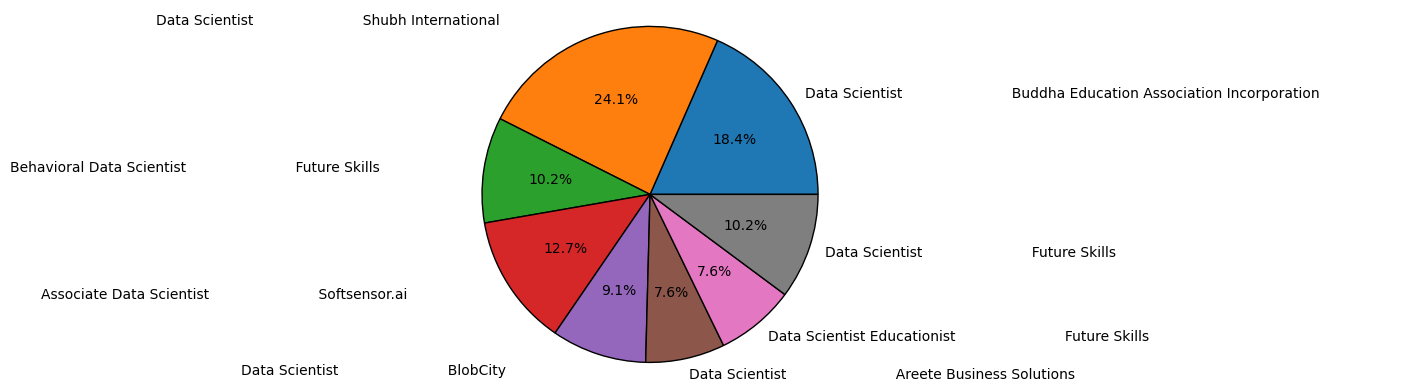

In [85]:
plt.pie(DS['Avg_Salary'],labels=DS['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()

# Data Analyst Jobs

In [80]:
DA=Df2[Df2.Jobs.str.contains('Analyst',case=False)]

In [81]:
DA

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Primary H...,02,2.0,12.0,2.0
4,Research Analyst Jade ...,02,2.0,4.0,2.0
6,Business Analyst Vumon...,02,2.4,3.0,2.7
8,Business Analyst Futur...,05,3.0,5.0,4.0
12,Business Analyst Arth ...,02,2.0,3.0,2.5
13,Junior Business Analyst ...,05,5.0,7.0,6.0
14,Executive Analyst & Operations ...,02,2.0,4.0,3.0
21,Financial Data Analyst ...,02,3.6,9.0,3.6
31,Associate Business Analyst ...,02,3.6,4.2,3.9
34,Quality Assurance Analyst ...,05,4.0,6.0,5.0


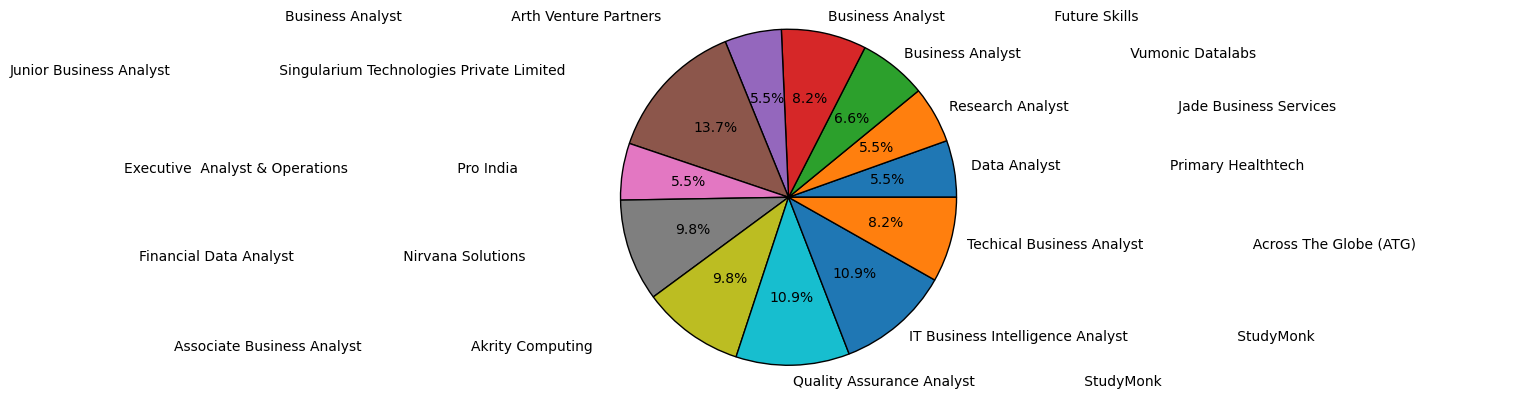

In [86]:
plt.pie(DA['Min_Salary'],labels=DA['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()

# ML Jobs

In [72]:
ML=Df2[Df2.Jobs.str.contains('Engineer',case=False)]

In [73]:
ML

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
7,Computer Vision & NLP AI Engineer (Fresher/Ex...,05,5.0,5.0,5.0
10,Machine Learning Engineer ...,05,10.0,55.0,32.5
11,Machine Learning Engineer ...,02,3.0,4.0,3.5
24,Technical Research Engineer ...,02,2.0,2.2,2.1
28,Machine Learning Engineer ...,05,3.6,5.0,4.3
30,Python (AI/ML) Engineer ...,02,2.0,4.0,3.0
37,Data Engineer StudyMon...,05,4.0,6.0,5.0


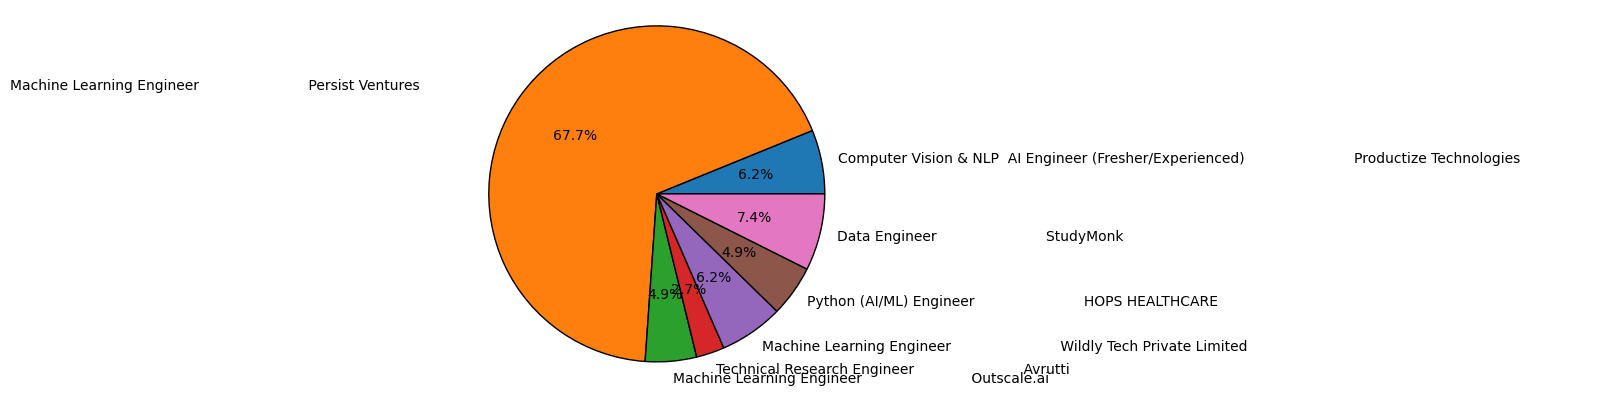

In [83]:
plt.pie(ML['Max_Salary'],labels=ML['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()